In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('spam uci.csv',encoding="latin1")
df.sample(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5087,ham,"Good morning, im suffering from fever and dyse...",NaN,NaN,NaN
5021,ham,Yes its possible but dint try. Pls dont tell t...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

Data cleaning 

In [5]:
print(df.columns.tolist())
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [6]:
df.sample(5)

,v1,v2
5446,ham,I am back. Good journey! Let me know if you ne...
4381,ham,yeah sure thing mate haunt got all my stuff so...
1119,spam,"Bored of speed dating? Try SPEEDCHAT, txt SPEE..."
2405,ham,I'm meeting Darren...
4758,spam,Thanks 4 your continued support Your question ...


In [7]:
df.columns= ['target','text']

In [8]:
df.sample(5)

,target,text
5329,ham,"Sir, waiting for your letter."
5260,ham,If anyone calls for a treadmill say you'll buy...
4175,ham,He's in lag. That's just the sad part but we k...
4595,ham,Carlos is down but I have to pick it up from h...
806,ham,"sure, but make sure he knows we ain't smokin yet"


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,target,text
3644,1,wamma get laid?want real doggin locations sent...
4145,0,I canåÕt wait for cornwall. Hope tonight isnåÕ...
1539,0,You're not sure that I'm not trying to make xa...
5239,0,"Jay wants to work out first, how's 4 sound?"
4393,0,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

EDA

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

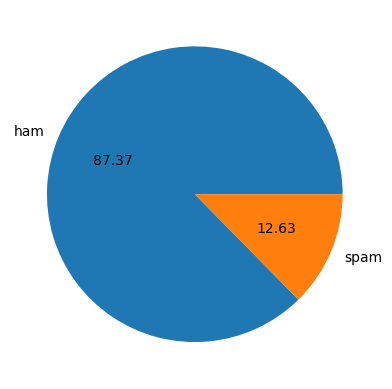

In [16]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [17]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
from nltk.tokenize import word_tokenize
df['numCharacters'] = df['text'].apply(len)
df['numWords'] = df['text'].apply(lambda x : len(nltk.word_tokenize(str(x))))
df['numSen'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(str(x))))

df.head(5)

,target,text,numCharacters,numWords,numSen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[df['target']==0][['numCharacters','numWords','numSen']].describe()

,numCharacters,numWords,numSen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
df[df['target']==1][['numCharacters','numWords','numSen']].describe()

,numCharacters,numWords,numSen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='numCharacters', ylabel='Count'>

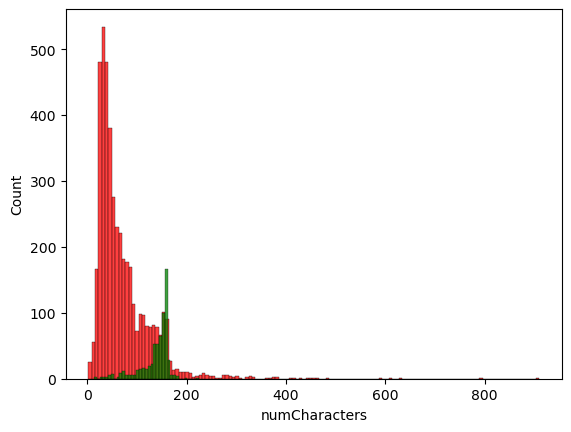

In [21]:
import seaborn as sns
sns.histplot(df[df['target']==0]['numCharacters'],color='red')
sns.histplot(df[df['target']==1]['numCharacters'],color='green')


<Axes: xlabel='numWords', ylabel='Count'>

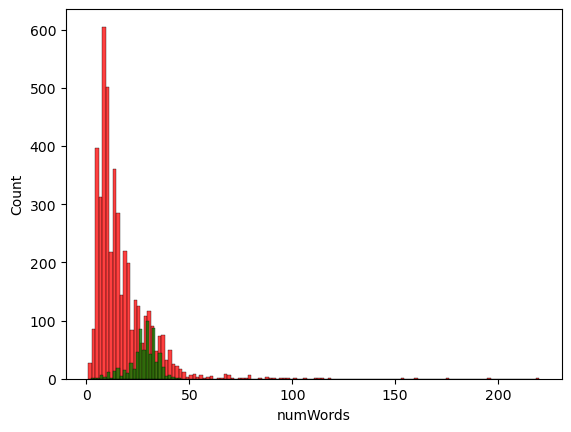

In [22]:
sns.histplot(df[df['target']==0]['numWords'],color='red')
sns.histplot(df[df['target']==1]['numWords'],color='green')

<Axes: xlabel='numSen', ylabel='Count'>

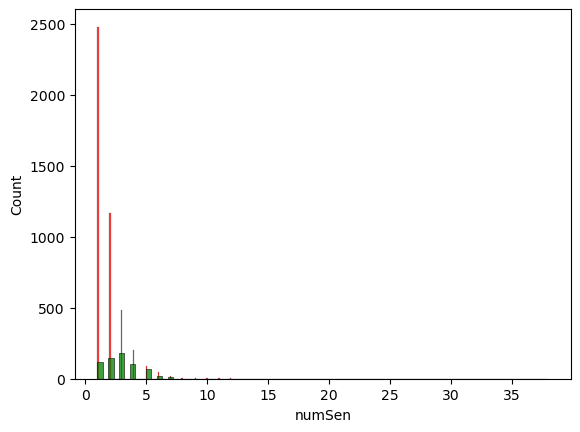

In [23]:
sns.histplot(df[df['target']==0]['numSen'],color='red')
sns.histplot(df[df['target']==1]['numSen'],color='green')

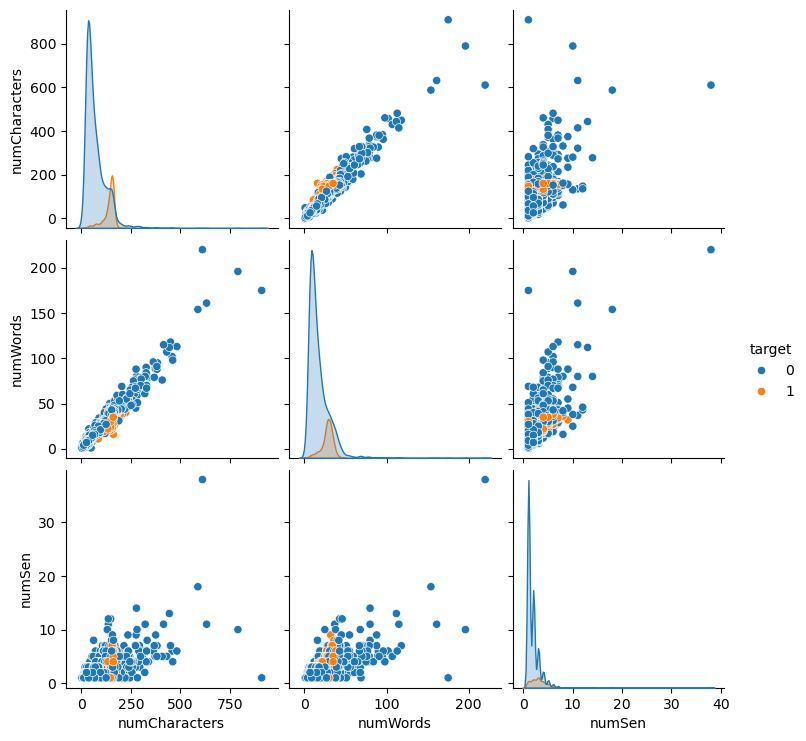

In [24]:
sns.pairplot(df,hue='target')

<Axes: >

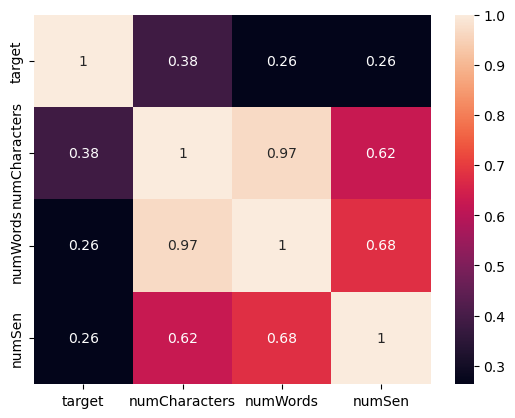

In [25]:
sns.heatmap(df[['target','numCharacters','numWords','numSen']].corr(),annot=True)

In [26]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
import string
from nltk.stem.porter import PorterStemmer
punctuation = string.punctuation

ps = PorterStemmer()


In [28]:
def tranformText(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    tmp = []
    for i in text:
        if i.isalnum() and i not in stopWords and i not in punctuation:
            i = ps.stem(i)
            tmp.append(i)
    return " ".join(tmp)

In [29]:
tranformText("Subject: vocable % rnd - word asceticism vcsc - brand new stock for your attention vocalscape inc - the stock symbol is : vcsc vcsc will be our top stock pick for the month of april - stock expected to bounce to 12 cents level the stock hit its all time low and will bounce back stock is going to explode in next 5 days - watch it soar watch the  tock go crazy this and next week .breaking news - vocalscape inc . announces agreement to resell mix network services current price : $ 0 . 025 we expect projected speculative price in next 5 days : $ 0 . 12 we expect projected speculative price in next 15 days : $ 0 . 15 vocalscape networks inc .")

'subject vocabl rnd word ascetic vcsc brand new stock attent vocalscap inc stock symbol vcsc vcsc top stock pick month april stock expect bounc 12 cent level stock hit time low bounc back stock go explod next 5 day watch soar watch tock go crazi next week news vocalscap inc announc agreement resel mix network servic current price 0 025 expect project specul price next 5 day 0 12 expect project specul price next 15 day 0 15 vocalscap network inc'

In [30]:
df['newText'] = df['text'].apply(tranformText)
df.head(5)

,target,text,numCharacters,numWords,numSen,newText
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [31]:
!pip install wordcloud
from wordcloud import WordCloud

In [32]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")


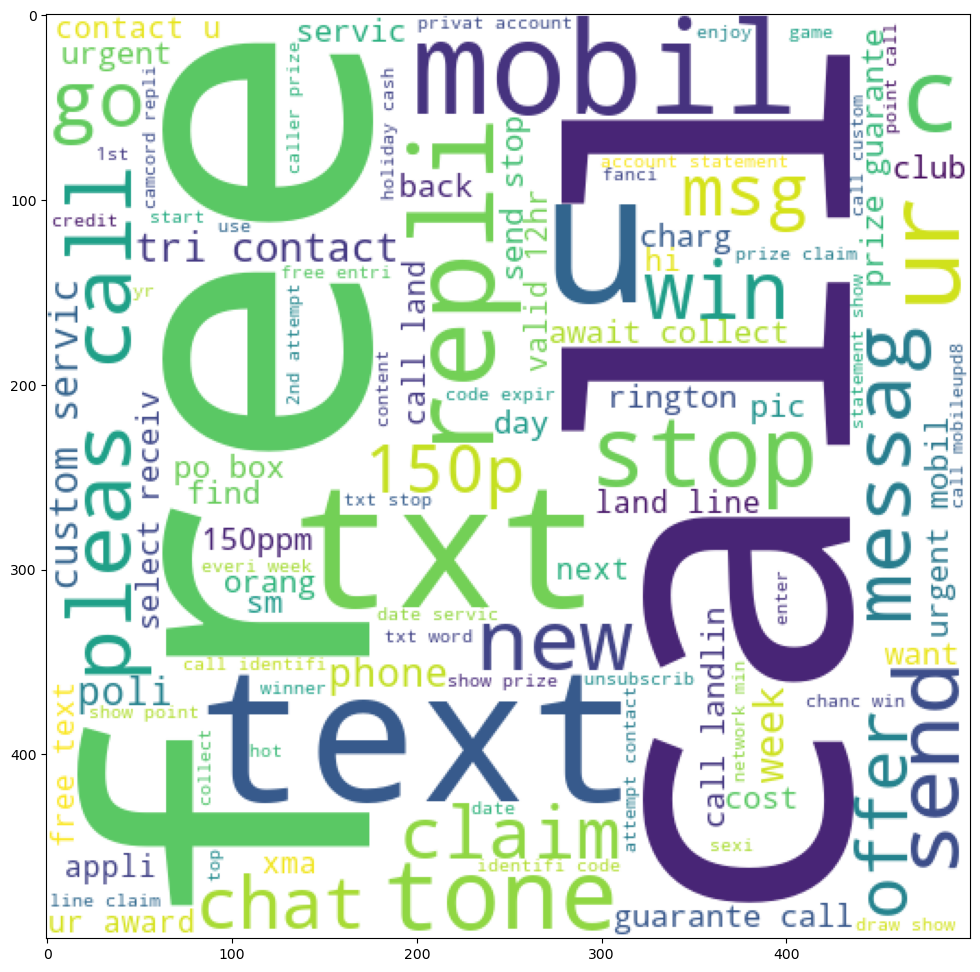

In [33]:
spamWC = wc.generate(df[df['target']==1]['newText'].str.cat(sep=' '))
plt.figure(figsize=(12,12))
plt.imshow(spamWC)

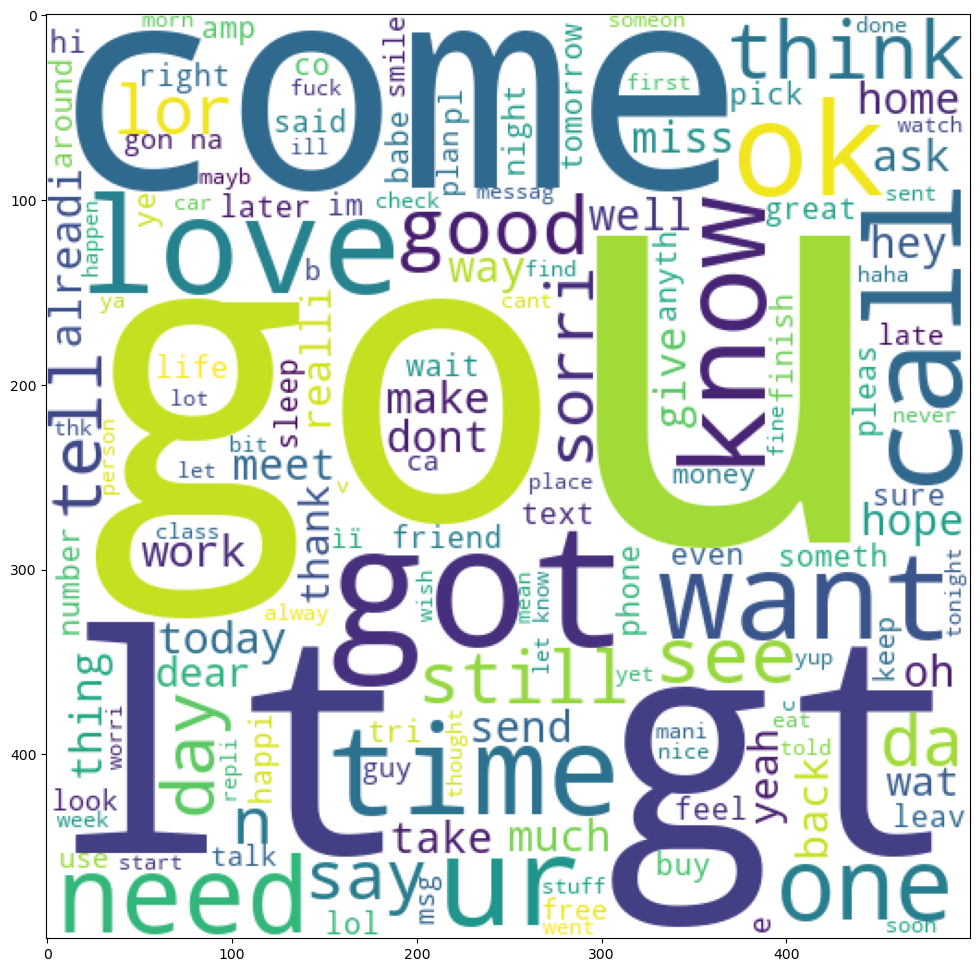

In [34]:
spamWC = wc.generate(df[df['target']==0]['newText'].str.cat(sep=' '))
plt.figure(figsize=(12,12))
plt.imshow(spamWC)

In [35]:
spamWord = []
for msg in df[df['target']==1]['newText'].tolist():
    for word in msg.split(" "):
        spamWord.append(word)



In [36]:
from collections import Counter
spamCmmnWord = Counter(spamWord).most_common(30)

In [37]:
spamCmmnWord

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [38]:
spamWord = []
for msg in df[df['target']==0]['newText'].tolist():
    for word in msg.split(" "):
        spamWord.append(word)

notSpamCmmnWord = Counter(spamWord).most_common(30)



In [39]:
notSpamCmmnWord

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

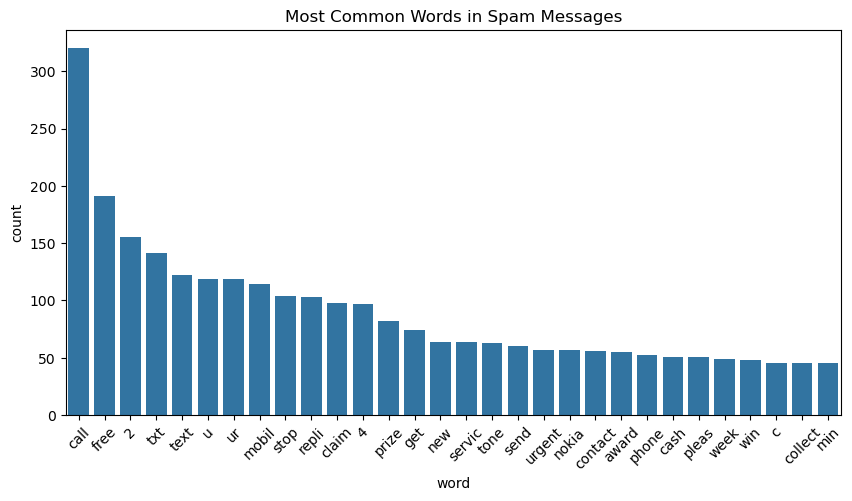

In [40]:
spam_df = pd.DataFrame(spamCmmnWord, columns=['word', 'count'])

# plot
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation=45)
plt.title("Most Common Words in Spam Messages")
plt.show()

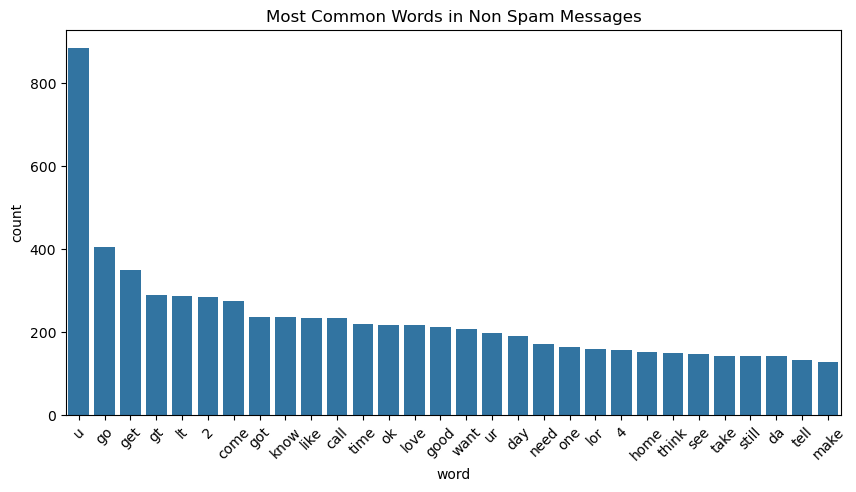

In [41]:
notSpam_df = pd.DataFrame(notSpamCmmnWord, columns=['word', 'count'])

# plot
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=notSpam_df)
plt.xticks(rotation=45)
plt.title("Most Common Words in Non Spam Messages")
plt.show()

MODEL BUILDING 

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [43]:
x = cv.fit_transform(df['newText']).toarray()
y = df['target']
print(f"{x.shape} {y.shape}")

(5169, 6708) (5169,)


In [44]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.2,random_state=20)
print(f"{xTrain.shape} {yTrain.shape} {xTest.shape}  {yTest.shape}")

(4135, 6708) (4135,) (1034, 6708)  (1034,)


In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score,confusion_matrix

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



GNB

In [46]:
gnb.fit(xTrain,yTrain)
ygnb = gnb.predict(xTest)
print(accuracy_score(yTest,ygnb))
print(precision_score(yTest,ygnb))
print(r2_score(yTest,ygnb))
print(confusion_matrix(yTest,ygnb))
print(recall_score(yTest,ygnb))


0.867504835589942
0.5182186234817814
-0.09263544366284093
[[769 119]
 [ 18 128]]
0.8767123287671232


In [47]:
mnb.fit(xTrain,yTrain)
ymnb = mnb.predict(xTest)
print(accuracy_score(yTest,ymnb))
print(precision_score(yTest,ymnb))
print(r2_score(yTest,ymnb))
print(confusion_matrix(yTest,ymnb))
print(recall_score(yTest,ymnb))

0.9758220502901354
0.9115646258503401
0.8006139701345181
[[875  13]
 [ 12 134]]
0.9178082191780822


In [48]:
bnb.fit(xTrain,yTrain)
ybnb = bnb.predict(xTest)
print(accuracy_score(yTest,ybnb))
print(precision_score(yTest,ybnb))
print(r2_score(yTest,ybnb))
print(confusion_matrix(yTest,ybnb))
print(recall_score(yTest,ybnb))

0.9671179883945842
0.9827586206896551
0.7288349993829446
[[886   2]
 [ 32 114]]
0.7808219178082192


using TFV vectorizer 

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer()
xtfv = tfv.fit_transform(df['newText']).toarray()
xtfv.shape
ytfv = df['target'] 
print(f"{xtfv.shape}  {ytfv.shape}")

(5169, 6708)  (5169,)


In [50]:

xtfvTrain, xtfvTest, ytfvTrain, ytfvTest = train_test_split(xtfv,ytfv,test_size=.2,random_state=20)
print(f"{xtfvTrain.shape} {ytfvTrain.shape} {xtfvTest.shape}  {ytfvTest.shape}")
tfvgnb = GaussianNB()
tfvmnb = MultinomialNB()
tfvbnb = BernoulliNB()

(4135, 6708) (4135,) (1034, 6708)  (1034,)


In [51]:
tfvgnb.fit(xtfvTrain,ytfvTrain)
ytfvgnb = tfvgnb.predict(xtfvTest)
print(accuracy_score(yTest,ytfvgnb))
print(precision_score(yTest,ytfvgnb))
print(r2_score(yTest,ytfvgnb))
print(confusion_matrix(yTest,ytfvgnb))
print(recall_score(yTest,ytfvgnb))

0.8597678916827853
0.5020746887966805
-0.15643897321979527
[[768 120]
 [ 25 121]]
0.8287671232876712


In [52]:
tfvmnb.fit(xtfvTrain,ytfvTrain)
ytfvmnb = tfvmnb.predict(xtfvTest)
print(accuracy_score(yTest,ytfvmnb))
print(precision_score(yTest,ytfvmnb))
print(r2_score(yTest,ytfvmnb))
print(confusion_matrix(yTest,ytfvmnb))
print(recall_score(yTest,ytfvmnb))

0.9574468085106383
1.0
0.6490805874367518
[[888   0]
 [ 44 102]]
0.6986301369863014


In [53]:
tfvbnb.fit(xtfvTrain,ytfvTrain)
ytfvbnb = tfvbnb.predict(xtfvTest)
print(accuracy_score(yTest,ytfvbnb))
print(precision_score(yTest,ytfvbnb))
print(r2_score(yTest,ytfvbnb))
print(confusion_matrix(yTest,ytfvbnb))
print(recall_score(yTest,ytfvbnb))

0.9671179883945842
0.9827586206896551
0.7288349993829446
[[886   2]
 [ 32 114]]
0.7808219178082192


TFV with MNB choosed 

In [ ]:
import pickle
pickle.dump(tfv ,open('tfv.pkl','wb'))
pickle.dump(tfvmnb,open('model.pkl','wb'))
pickle.dump(tfvmnb,open('pickle.dump(tfvmnb,open('model.pkl','wb'))
.pkl','wb'))

